### Exercise 1

First of all, we import some usefull libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os as os
import shutil as shutil

from sklearn.datasets import load_files
from sklearn.datasets.base import Bunch
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

We load our data and display target names.

In [2]:
data1 = load_files('data/Enron_1/', encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )
data1['target_names']

['ham', 'spam']

# A

We want to split our data into train-test set with proportion of 80-20. In order to do that, we're using ${\it train\_test\_split}$ method, from sklearn.

First of all, we convert our data to pandas dataframe, so this way it's easier to manage it.

In [3]:
df1 = pd.DataFrame({'text': data1['data'], 'spam': data1['target']})

N_data = len(df1)
N_train_data = int(0.8 * N_data); N_test_data = N_data - N_train_data

train_data, test_data = train_test_split(df1, train_size=N_train_data, test_size=N_test_data)

print(df1.spam.value_counts())

0    2937
1    1200
Name: spam, dtype: int64


As an example, we take first 5 rows of train data.

In [4]:
train_data.head(5)

,spam,text
1750,1,"Subject: how to confidently attract , meet and..."
949,0,"Subject: re : cilco storage\r\nyes , they are ..."
1404,1,Subject: stockalert : investors need to know\r...
3888,0,Subject: alternative work schedule status\r\na...
1101,1,"Subject: guaranteed satisfaction , cheapest pr..."


Then, we use ${\it CountVectorizer}$ method from sklearn in order to convert the collection of text documents to a matrix of token counts.

In [5]:
vectorizer = CountVectorizer()
spam_features = vectorizer.fit_transform(train_data.text)

print(spam_features.toarray())

[[0 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [6]:
shape = spam_features.shape
print('The resulting vocabulary has a shape of:', shape, 'and its lenght is:', shape[1])

The resulting vocabulary has a shape of: (3309, 38225) and its lenght is: 38225


As an example of methods of vectorizer function, we can see how many times does ${\it please}$ appear in the mails.

In [7]:
vectorizer.vocabulary_['please']

27430

Then, we apply multinomial Naive Bayes in order to classify our dataset. We're using ${\it MultinomialNB}$ method from sklearn. Finally, we fit it with our train dataset and our features.

In [8]:
base_spam_classifier = MultinomialNB()
base_spam_classifier.fit(spam_features, train_data.spam)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# B

## 1

Using the test set, we calculate the confusion matrix (know as an error matrix) using ${\it confusion\_matrix}$ method from sklearn using the test set, and then we plot it.

Since ${\it plot\_confusion\_matrix}$ method is not working, we calculate matrix coefficients and them plot it with ${\it imshow}$ method, from matplotlib. Nevertheless, ${\it plot\_confusion\_matrix}$ method should work.

In [9]:
test_features = vectorizer.transform(test_data.text)
base_predicted =  base_spam_classifier.predict(test_features)
confusion_matrix(test_data.spam, base_predicted)
#plot_confusion_matrix(base_spam_classifier, test_data.text, test_data.spam)

array([[587,   9],
       [  8, 224]])

And we plot it.

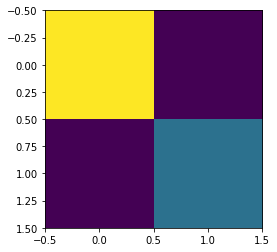

In [10]:
plt.imshow(confusion_matrix(test_data.spam, base_predicted))

## 2

Now, we calculate ${\it recall}$ and ${\it precison}$ scores with sklearn library, as well as the accuracy. We can see that we obtain high values, so it's fine.

In [11]:
print('The accuracy is:' ,accuracy_score(test_data.spam, base_predicted))
print('The recall score is:', recall_score(test_data.spam, base_predicted))
print('The precision score is:', precision_score(test_data.spam, base_predicted))

The accuracy is: 0.9794685990338164
The recall score is: 0.9655172413793104
The precision score is: 0.9613733905579399


## 3

Then, we proceed to calculate ROC curve and AUC score with sklearn library. In order to do that, we calculate estimated probabilities with ${\it preditc\_proba}$ method. First of all, we calculate TPR and FPR scores.

In [12]:
base_proba = base_spam_classifier.predict_proba(test_features)

fpr, tpr, ths = roc_curve(test_data.spam, base_proba[:,1])

print('TPR =', np.round(tpr, 3))
print('FPR =', np.round(fpr, 3))

TPR = [0.    0.591 0.616 0.616 0.862 0.862 0.866 0.866 0.905 0.905 0.935 0.935
 0.991 0.991 0.996 0.996 1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.   ]
FPR = [0.    0.007 0.007 0.008 0.008 0.01  0.01  0.012 0.012 0.013 0.013 0.015
 0.015 0.018 0.018 0.022 0.022 0.06  0.064 0.102 0.106 0.107 0.111 0.159
 0.163 0.195 0.198 0.227 0.23  0.27  0.277 0.393 0.401 0.565 0.569 0.574
 0.577 0.671 0.674 0.706 0.71  0.772 0.775 0.948 1.   ]


Finally, we calculate that AUC score and prot ROC curve. We remark that red line, with between points $[0, 0]$ and $[1, 1]$ is randomly classified (this would be the standart classifier with $TPR, FPR = [0, 1]$).

AUC score: 0.9938599282573478


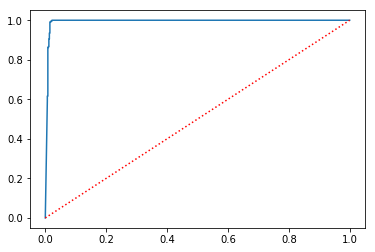

In [13]:
print('AUC score:', roc_auc_score(test_data.spam, base_proba[:,1]))

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ':r')

## 4

To get percentage of valid mails classified as spam we have to substract test data to predicted labels ($prediction - data$), so we get $+1$ where it is valid mail classified as spam, and $-1$ where it is spam classified as valid mail.

In [14]:
N_valid_mails = np.count_nonzero(np.array(test_data.spam) == 0)
np.count_nonzero((base_predicted - np.array(test_data.spam)) == 1) * 100 / N_valid_mails

1.5100671140939597

As we can see, we have about $1.5\%$ misclassified valid mails over all valid mails.

## 5

Now, we have to count number of $-1$ values using previous method, where it is spam classified as valild mail (ham).

In [15]:
N_classified_valid_mails = np.count_nonzero(np.array(base_predicted) == 0)
np.count_nonzero((base_predicted - np.array(test_data.spam)) == -1) * 100 / N_classified_valid_mails

1.3445378151260505

As we can see, we have about $3\%$ misclassified spam over all predicted as valid mails.

### C

First of all, we calculate position of ten most and least probable words using ${\it argsort}$ method from numpy.

In [16]:
n = 10

most_probable = np.argsort(base_spam_classifier.feature_log_prob_, axis=1)[:,-n-1:-1]
least_probable = np.argsort(base_spam_classifier.feature_log_prob_, axis=1)[:,0:n]

Then, we define ${\it word}$ function in order to get words in the vocabulary from those indices.

In [17]:
def word(i):
    return vectorizer.get_feature_names()[i]

word = np.vectorize(word)

So, we calculate the most and least probable words associate with these indices.

In [18]:
most_words = word(most_probable)

least_words = word(least_probable)

We can display it as dataframes. This is for most probable words. Each time we run the program we obtain nearly the same words, because this words are common instead we have different test data.

In [19]:
pd.DataFrame(most_words, index=['ham', 'spam'], columns=range(1, n+1))

,1,2,3,4,5,6,7,8,9,10
ham,you,of,on,enron,subject,hou,for,and,ect,to
spam,subject,your,this,is,for,you,in,of,and,to


Finally, we display least probable words. Each time we run the program we obtain different words, because we have different test data and this words are not common.

In [20]:
pd.DataFrame(least_words, index=['ham', 'spam'], columns=range(1, n+1))

,1,2,3,4,5,6,7,8,9,10
ham,iezgm,loaders,loa,lnz,lnventory,lnterest,lnter,lnstant,lnsr,lnpefo
spam,wst,loses,yeverino,fossesca,seemyw,seelig,fosdick,buckets,buckley,seeger


# D

With os module we obtain all Enron files in data. Then, with a loop, we iterate all this files and calculate their recall and precision scores.

With Enron_1 we obtain slightly different values than before because now we're using all data as test data.

In [21]:
files = os.listdir('data')

for i in files:
    data = load_files('data/' + i, encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )
    
    df = pd.DataFrame({'text': data['data'], 'spam': data['target']})
        
    test_features_files = vectorizer.transform(df.text)
    base_predicted_files =  base_spam_classifier.predict(test_features_files)
    
    recall = recall_score(df.spam, base_predicted_files, average='macro')
    precision =  precision_score(df.spam, base_predicted_files, average='macro')
    
    print('File', i, 'has recall:', recall , 'and precision:', precision)

File Enron_5 has recall: 0.96625 and precision: 0.9408387924630242
File Enron_2 has recall: 0.9491545904133423 and precision: 0.9154253405533388
File Enron_3 has recall: 0.9700560922405734 and precision: 0.9470555110992561
File Enron_4 has recall: 0.9413830230619618 and precision: 0.9270554836420238
File Enron_1 has recall: 0.9792475314947224 and precision: 0.9830920914141368
File Enron_6 has recall: 0.9530555555555555 and precision: 0.9457197513151602


# E

We create a new folder with ${\it ham}$ and ${\it spam}$ subfolders, so we copy there all our data. We have to run it only once.

We use a new function to avoid some problems of ${\it copytree}$ method, from shutil module.

We could just store data in previous loop, but this way we have all data toghether, to use it in further calculations.

In [22]:
os.mkdir('all_data')
os.mkdir('ham')
os.mkdir('spam')

source = os.path.abspath(os.getcwd())
  
dest1 = shutil.move(source + '/ham', source + '/all_data')
dest2 = shutil.move(source + '/spam', source + '/all_data') 

files = os.listdir('data')

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

for i in files:
    copytree('data/' + i + '/ham', 'all_data/ham')
    copytree('data/' + i + '/spam', 'all_data/spam')

Once we do that, we can define a new data set and train the classifier.

In [23]:
all_data = load_files('all_data', encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )

df = pd.DataFrame({'text': all_data['data'], 'spam': all_data['target']})

N_all_data = len(df)
N_train_all_data = int(0.8 * N_all_data); N_test_all_data = N_all_data - N_train_all_data

train_all_data, test_all_data = train_test_split(df, train_size=N_train_all_data, test_size=N_test_all_data)

print(df.spam.value_counts())

1    13736
0    13234
Name: spam, dtype: int64


In [24]:
spam_features = vectorizer.fit_transform(train_all_data.text)
base_spam_classifier.fit(spam_features, train_all_data.spam)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## $B_1$

Using the test set, we draw the confusion matrix using  plot_confusion_matrix  method from sklearn using the test set.

In [25]:
test_features = vectorizer.transform(test_all_data.text)
base_predicted =  base_spam_classifier.predict(test_features)
confusion_matrix(test_all_data.spam, base_predicted)

array([[2614,   41],
       [  36, 2703]])

And we plot it.

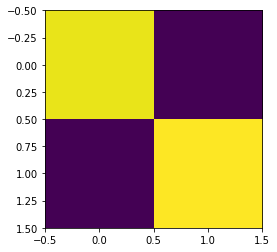

In [26]:
plt.imshow(confusion_matrix(test_all_data.spam, base_predicted))

## $B_2$

Now, we calculate  recall  and  precison  scores with sklearn library, as well as the accuracy. We can see that we obtain high values, so it's fine.

In [27]:
print('The accuracy is:' ,accuracy_score(test_all_data.spam, base_predicted))
print('The recall score is:', recall_score(test_all_data.spam, base_predicted))
print('The precision score is:', precision_score(test_all_data.spam, base_predicted))

The accuracy is: 0.985724879495736
The recall score is: 0.9868565169769989
The precision score is: 0.9850583090379009


## $B_3$

Then, we proceed to calculate ROC curve and AUC score with sklearn library. In order to do that, we calculate estimated probabilities with  preditc_proba  method. First of all, we calculate TPR and FPR scores.

In [28]:
base_proba = base_spam_classifier.predict_proba(test_features)

fpr, tpr, ths = roc_curve(test_all_data.spam, base_proba[:,1])

print('TPR =', np.round(tpr, 3))
print('FPR =', np.round(fpr, 5))

TPR = [0.    0.735 0.736 0.741 0.742 0.746 0.747 0.751 0.752 0.756 0.756 0.758
 0.759 0.76  0.761 0.762 0.763 0.764 0.765 0.767 0.768 0.769 0.769 0.77
 0.771 0.772 0.773 0.774 0.775 0.777 0.777 0.778 0.781 0.782 0.786 0.787
 0.793 0.793 0.794 0.795 0.797 0.798 0.801 0.802 0.803 0.804 0.813 0.814
 0.835 0.835 0.857 0.858 0.859 0.86  0.864 0.865 0.875 0.876 0.889 0.889
 0.894 0.895 0.9   0.9   0.903 0.905 0.908 0.909 0.913 0.914 0.919 0.92
 0.921 0.921 0.93  0.931 0.936 0.936 0.939 0.939 0.942 0.942 0.948 0.948
 0.951 0.951 0.954 0.954 0.959 0.96  0.961 0.961 0.964 0.964 0.965 0.965
 0.965 0.968 0.968 0.97  0.97  0.97  0.97  0.973 0.974 0.974 0.978 0.978
 0.981 0.981 0.982 0.982 0.983 0.983 0.984 0.984 0.985 0.985 0.985 0.985
 0.985 0.985 0.987 0.987 0.988 0.99  0.991 0.992 0.993 0.993 0.994 0.994
 0.994 0.994 0.995 0.995 0.995 0.995 0.996 0.996 0.996 0.996 0.997 0.997
 0.997 0.997 0.997 0.997 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.998
 0.998 0.998 0.999 0.999 0.999 0.999 0.999 0.99

Finally, we calculate that AUC score and plot ROC curve. We remark that red line, between points [0,0] and [1,1], is randomly classified (this would be the standart classifier with $TPR,FPR=[0,1]$).

We obtain a similar than before AUC score (maybe a bit lower sometimes, it depends on train-test sets).

AUC score: 0.9964118758891068


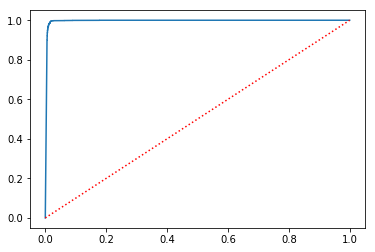

In [29]:
print('AUC score:', roc_auc_score(test_all_data.spam, base_proba[:,1]))

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ':r')

## $B_4$

To get percentage of valid mails classified as spam we have to substract test data to predicted labels ($predictio−data$), so we get  +1  where it is valid mail classified as spam, and  −1  where it is spam classified as valid mail.

In [30]:
N_valid_mails =  np.count_nonzero(np.array(test_all_data.spam) == 0)
np.count_nonzero((base_predicted - np.array(test_all_data.spam)) == 1) * 100 / N_valid_mails

1.5442561205273069

As we can see, we have about  1.5%  misclassified valid mails over all valid mails.

## $B_5$

Now, we have to count number of  −1  values using previous method, where it is spam classified as valild mail (ham).

In [31]:
N_classified_valid_mails = np.count_nonzero(np.array(base_predicted) == 0)
np.count_nonzero((base_predicted - np.array(test_all_data.spam)) == -1) * 100 / N_classified_valid_mails

1.3584905660377358

As we can see, we have about  1%  misclassified spam over all classified as valid mails.

# F

Frequency of misclassified ham mails is equal to $FPR$, where: 

\begin{equation}
    FPR = \frac{FP}{FP + TN}
\end{equation}

Then, we use $ROC$ curve to calculate value of threeshold ($THS$) at this $FPR$ value. Then, we calculate confusion matrix at this threeshold, so we can calculate false omission rate ($FOR$), which is the percentage of spam (classified as ham) in our inbox, and where:

\begin{equation}
    FOR = \frac{FN}{FN + TN}
\end{equation}

We want $FPR = 0.5\%$, so we look to our values in $ROC$ curve and we do the average between firs and last value of $THS$ rounded equal to $0.005$ (we're doing an interpolation, wich should be really accurate).

In [32]:
THS = (ths[np.where(np.round(fpr, 3) == 0.005)][0] + ths[np.where(np.round(fpr, 3) == 0.005)][-1]) / 2
print('THS =', THS)

THS = 0.9999999240867994


Finally, we obtain our $FOR$.

In [33]:
[[TN, FP], [FN, TP]] = confusion_matrix(test_all_data.spam, base_proba[:, 1]>THS)
print('FOR =', FN / (FN + TN))

FOR = 0.10746873943899966


So, the percetage of spam in our inbox is around $10\%$.

We could use widgets form matplotlib library to get this value in ROC curve. But, since we're obtaning different values in the curve each time we iterate it, it's not usefull.

What's more, around $FPR = 0.5\%$ the curve behaves as a linear function, so interpolation should be a good option.